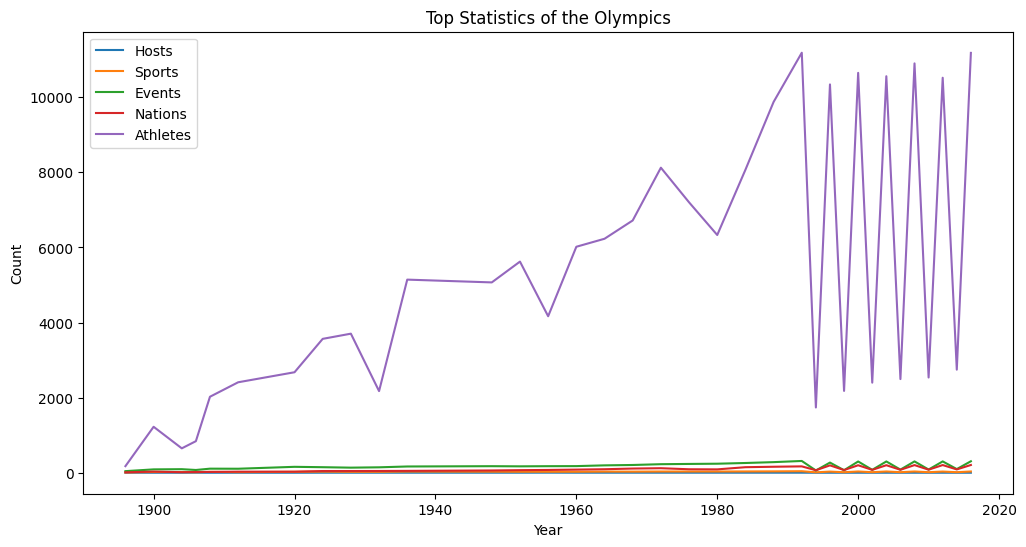

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

athlete_data = pd.read_csv('athlete_events.csv')
# Assuming athlete_data is your DataFrame containing the Olympic data
olympic_stats = athlete_data.groupby('Year').agg({
    'City': 'nunique',   # Number of unique host cities per year
    'Sport': 'nunique',  # Number of unique sports per year
    'Event': 'nunique',  # Number of unique events per year
    'NOC': 'nunique',    # Number of unique nations per year
    'ID': 'nunique'      # Number of unique athletes per year
}).rename(columns={
    'City': 'Hosts', 
    'Sport': 'Sports', 
    'Event': 'Events', 
    'NOC': 'Nations', 
    'ID': 'Athletes'
})

# Plotting the data
olympic_stats.plot(kind='line', figsize=(12, 6))

# Adding title and labels
plt.title('Top Statistics of the Olympics')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.show()

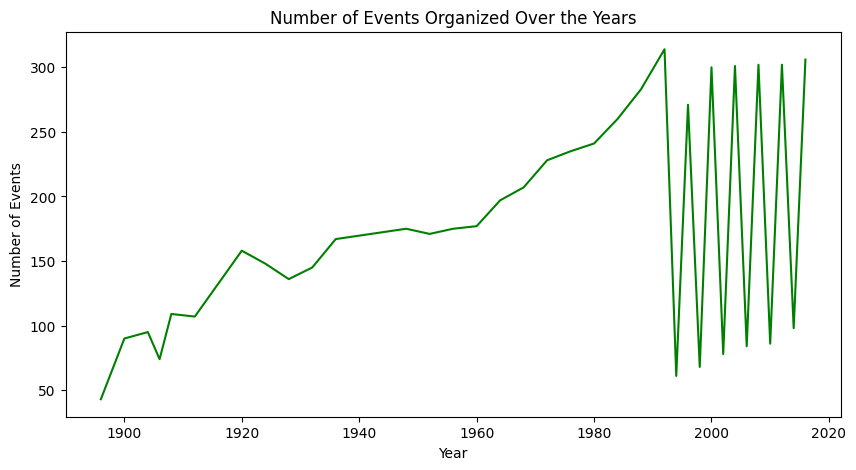

In [4]:
# Line graph of events over the years
events_per_year = athlete_data.groupby('Year')['Event'].nunique()

plt.figure(figsize=(10, 5))
events_per_year.plot(kind='line', color='green')
plt.title('Number of Events Organized Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

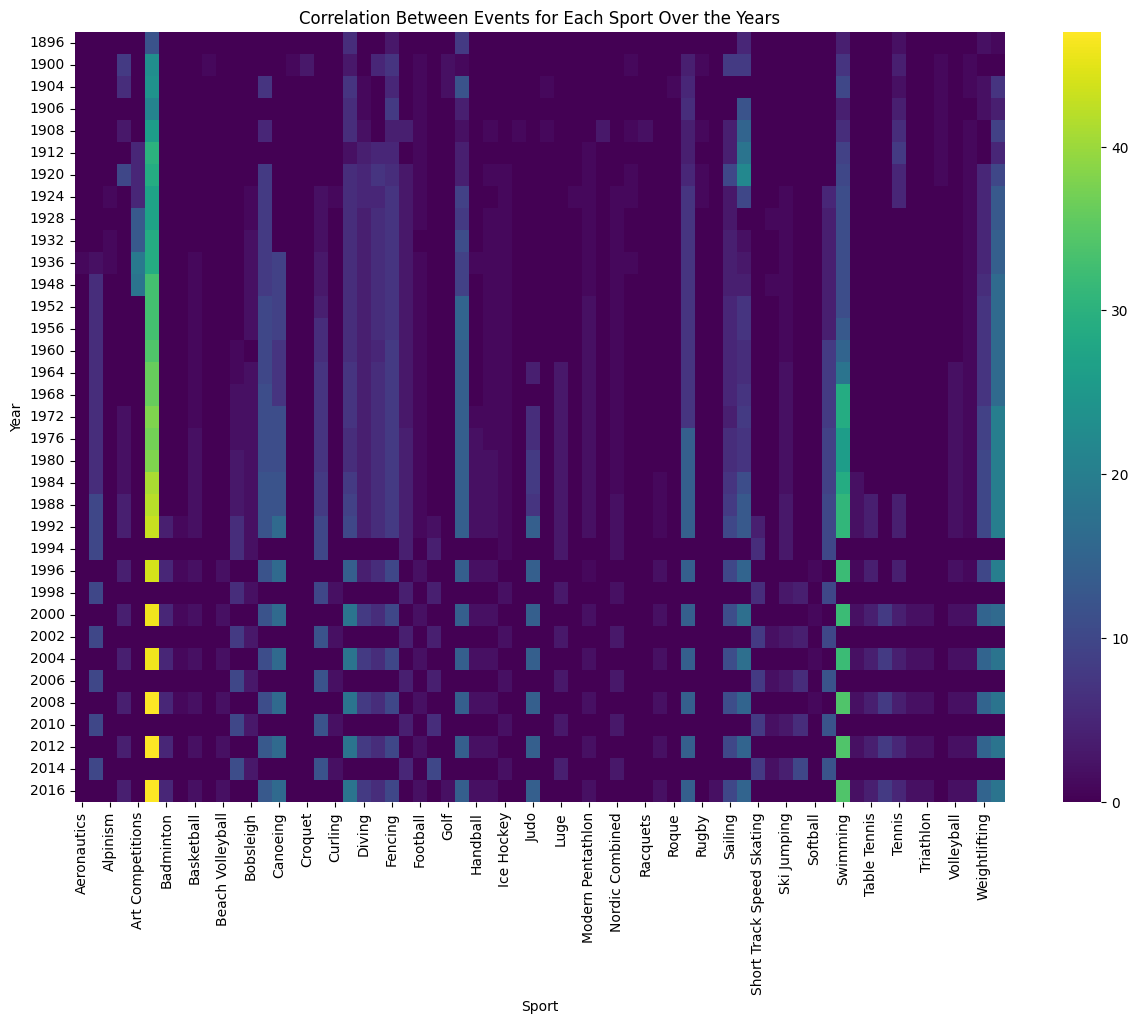

In [7]:
# Heatmap of correlation between Events and Sports w.r.t Year
event_sport_correlation = athlete_data.pivot_table(index='Year', columns='Sport', values='Event', aggfunc='nunique').fillna(0)

plt.figure(figsize=(15, 10))
sns.heatmap(event_sport_correlation, cmap='viridis')
plt.title('Correlation Between Events for Each Sport Over the Years')
plt.xlabel('Sport')
plt.ylabel('Year')
plt.show()

In [8]:
# Table of top 15 athletes by total medals
top_athletes = athlete_data[athlete_data['Medal'] != 0].groupby('Name')['Medal'].count().sort_values(ascending=False).head(15)
print(top_athletes)

Name
Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Takashi Ono                                        13
Borys Anfiyanovych Shakhlin                        13
Ole Einar Bjrndalen                                13
Edoardo Mangiarotti                                13
Natalie Anne Coughlin (-Hall)                      12
Sawao Kato                                         12
Dara Grace Torres (-Hoffman, -Minas)               12
Paavo Johannes Nurmi                               12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Aleksey Yuryevich Nemov                            12
Ryan Steven Lochte                                 12
Birgit Fischer-Schmidt                             12
Name: Medal, dtype: int64


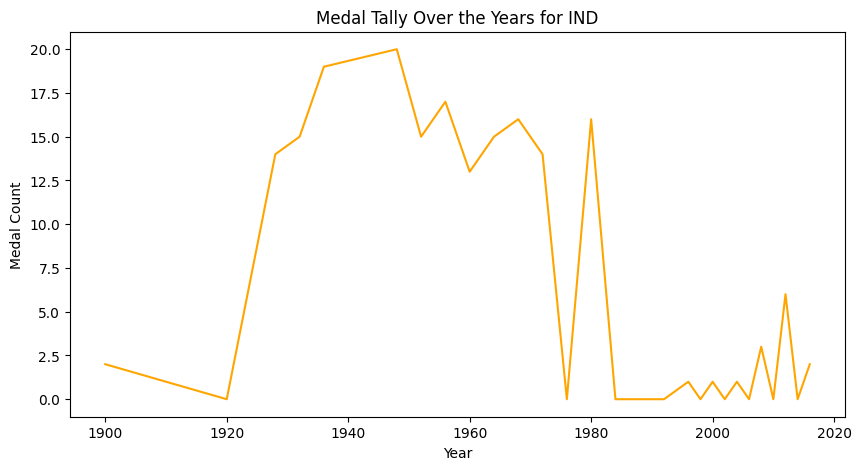

In [24]:
# Medal tally for a specific country (replace 'USA' with any country)
country = 'IND'
medal_tally_country = athlete_data[athlete_data['NOC'] == country].groupby('Year')['Medal'].count()

plt.figure(figsize=(10, 5))
medal_tally_country.plot(kind='line', color='orange')
plt.title(f'Medal Tally Over the Years for {country}')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.show()

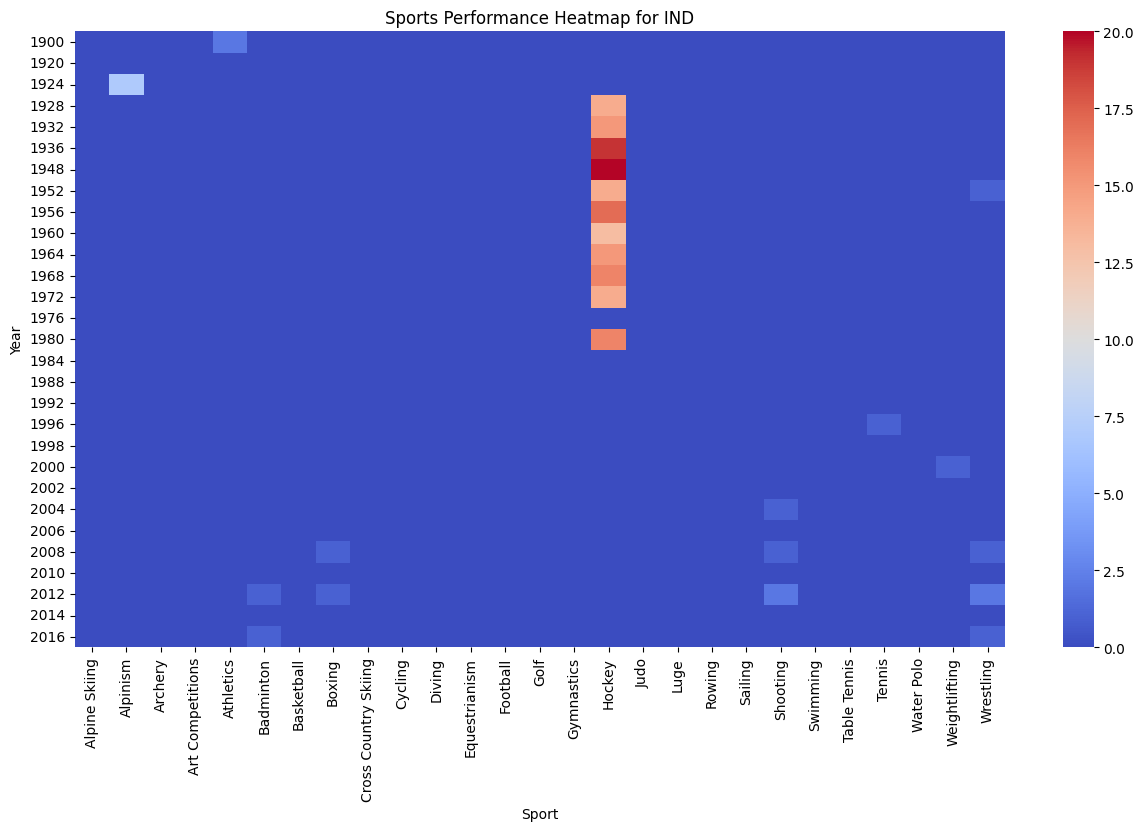

In [26]:
# Heatmap of medal counts by sport for a specific country (replace 'USA' with any country)
country = 'IND'
sport_medals_country = athlete_data[athlete_data['NOC'] == country].pivot_table(index='Year', columns='Sport', values='Medal', aggfunc='count').fillna(0)

plt.figure(figsize=(15, 8))
sns.heatmap(sport_medals_country, cmap='coolwarm')
plt.title(f'Sports Performance Heatmap for {country}')
plt.xlabel('Sport')
plt.ylabel('Year')
plt.show()

/var/folders/5j/ydxbl6jd06d7wyxfhvr83blr0000gn/T/ipykernel_4595/3606676133.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(medal_winners['Age'], shade=True)


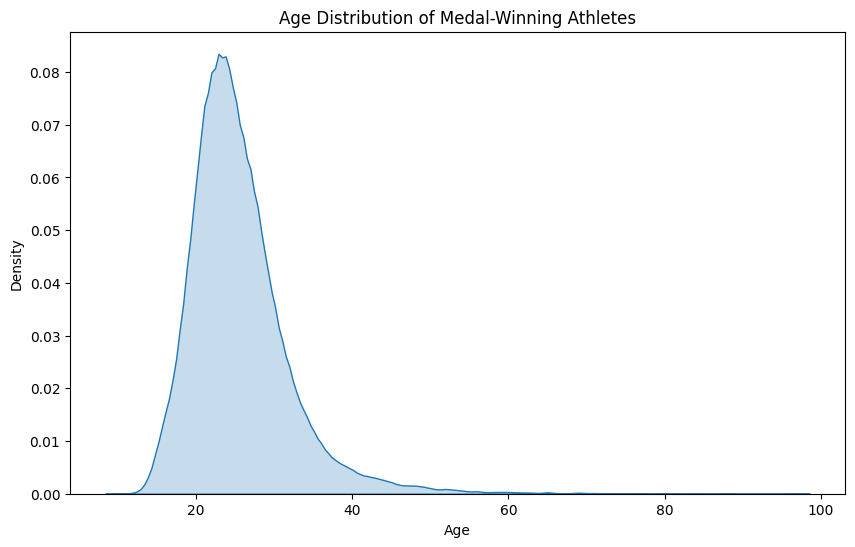

In [27]:
# Distribution of age for medal-winning athletes
medal_winners = athlete_data[athlete_data['Medal'] != 0]

plt.figure(figsize=(10, 6))
sns.kdeplot(medal_winners['Age'], shade=True)
plt.title('Age Distribution of Medal-Winning Athletes')
plt.xlabel('Age')
plt.show()

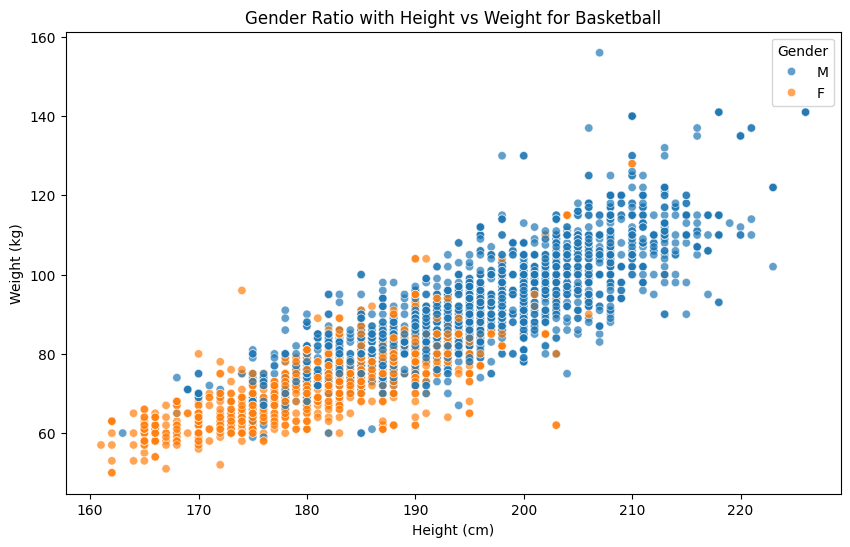

In [30]:
# Scatter plot for height vs weight based on gender for a specific sport
sport = 'Basketball'  # Replace with desired sport
sport_data = athlete_data[athlete_data['Sport'] == sport]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sport_data, x='Height', y='Weight', hue='Sex', alpha=0.7)
plt.title(f'Gender Ratio with Height vs Weight for {sport}')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Gender')
plt.show()

<Figure size 1000x500 with 0 Axes>

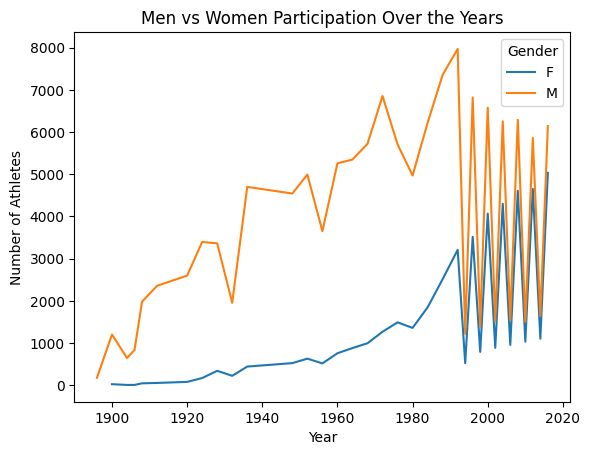

In [31]:
# Men vs Women participation over the years
gender_participation = athlete_data.groupby(['Year', 'Sex'])['ID'].nunique().unstack()

plt.figure(figsize=(10, 5))
gender_participation.plot(kind='line')
plt.title('Men vs Women Participation Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender')
plt.show()

In [33]:
# Table of top 10 athletes by medals for a specific country
country = 'IND'
top_athletes_country = athlete_data[(athlete_data['NOC'] == country) & (athlete_data['Medal'] != 0)].groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
print(top_athletes_country)


Name
Leslie Walter Claudius       4
Udham Singh Kular            4
Balbir Singh Dosanjh, Sr.    3
Harbinder Singh Chimni       3
Richard James Allen          3
Ranganathan Francis          3
Randhir Singh Gentle         3
Balbir Singh                 3
Victor John "V. J." Peter    3
Dhyan Chand Bais             3
Name: Medal, dtype: int64


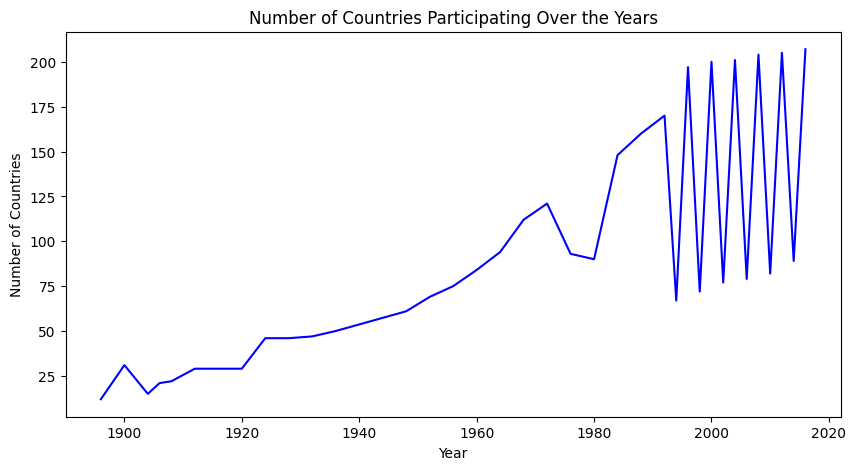

In [37]:
# Line graph of countries over the years
countries_per_year = athlete_data.groupby('Year')['NOC'].nunique()

plt.figure(figsize=(10, 5))
countries_per_year.plot(kind='line', color='blue')
plt.title('Number of Countries Participating Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.show()


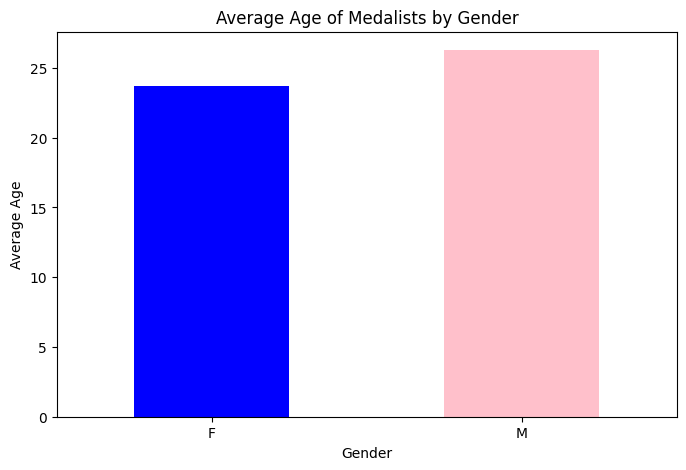

In [39]:
# Average age of medalists by gender
avg_age_medalists = athlete_data[athlete_data['Medal'] != 0].groupby('Sex')['Age'].mean()

plt.figure(figsize=(8, 5))
avg_age_medalists.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Age of Medalists by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()


<Figure size 1400x800 with 0 Axes>

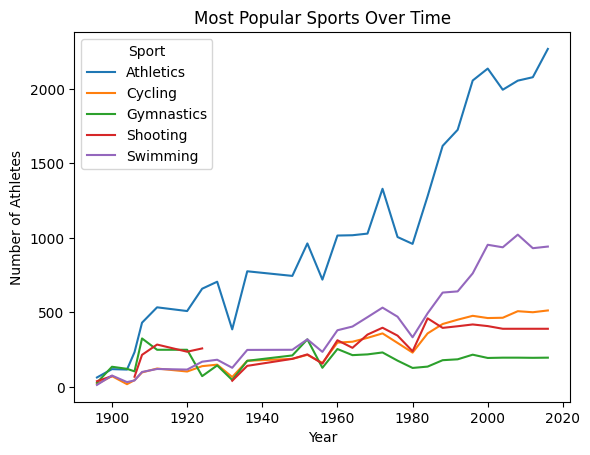

In [40]:
# Most popular sports over time by participant count
top_sports = athlete_data['Sport'].value_counts().head(5).index
popular_sports_over_time = athlete_data[athlete_data['Sport'].isin(top_sports)].groupby(['Year', 'Sport'])['ID'].nunique().unstack()

plt.figure(figsize=(14, 8))
popular_sports_over_time.plot(kind='line')
plt.title('Most Popular Sports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Sport')
plt.show()


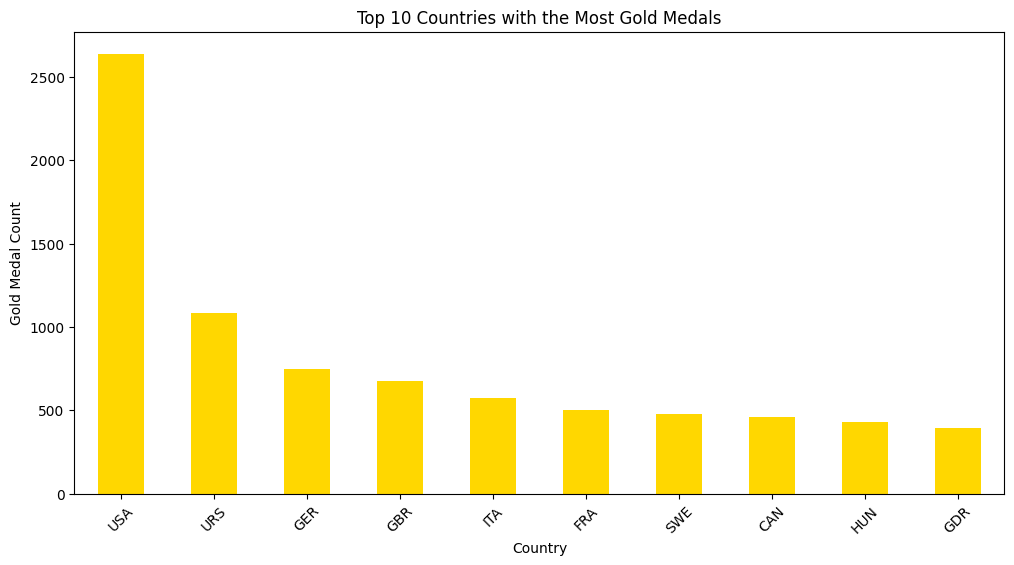

In [41]:
# Top 10 countries by gold medals
top_gold_countries = athlete_data[athlete_data['Medal'] == 'Gold'].groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_gold_countries.plot(kind='bar', color='gold')
plt.title('Top 10 Countries with the Most Gold Medals')
plt.xlabel('Country')
plt.ylabel('Gold Medal Count')
plt.xticks(rotation=45)
plt.show()


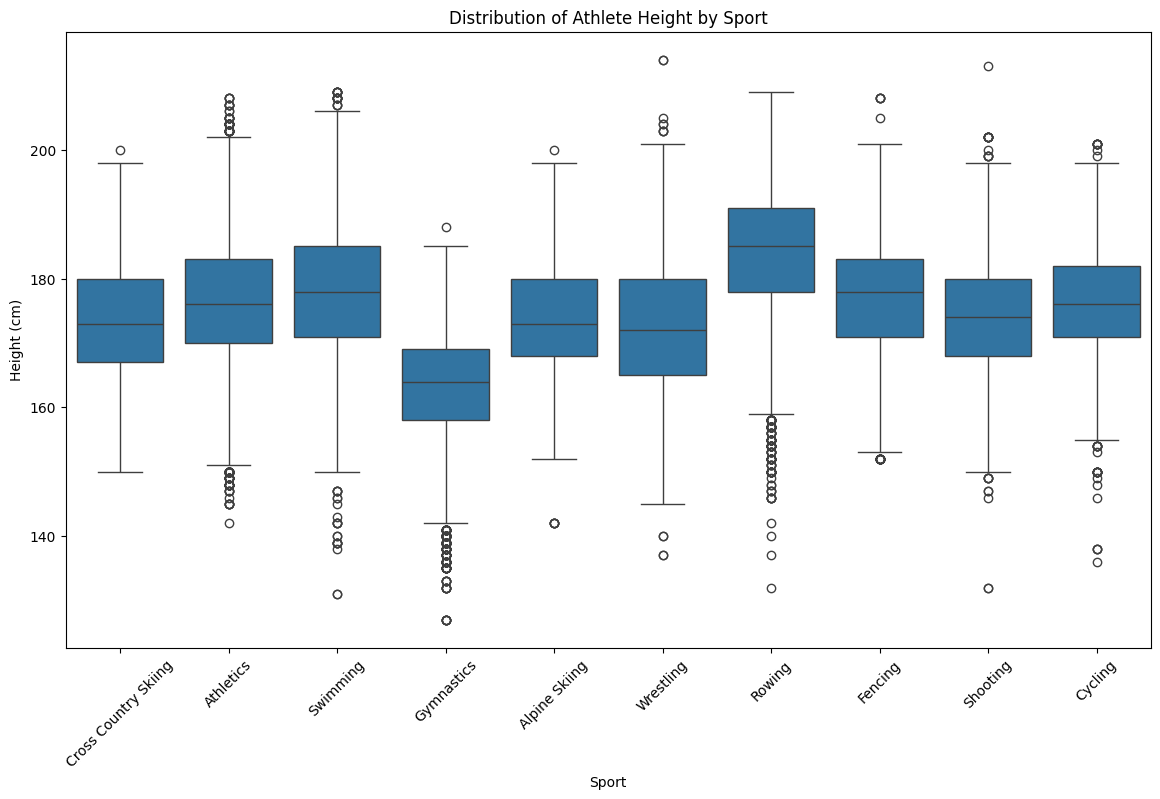

In [42]:
# Height distribution by sport (Top 10 sports for simplicity)
top_sports = athlete_data['Sport'].value_counts().head(10).index
height_sport_data = athlete_data[athlete_data['Sport'].isin(top_sports)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=height_sport_data, x='Sport', y='Height')
plt.title('Distribution of Athlete Height by Sport')
plt.xlabel('Sport')
plt.ylabel('Height (cm)')
plt.xticks(rotation=45)
plt.show()
